In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pasos
- Cargar datos 
- Normalizar datos 
- Agregar una columna de unos
- Calcular la prediccion (theta tanspuesta por X vector) 
- Calcular el costo (error)
- Dos formas para calcular los parámetros (thetas)
    - Ecuacion normal (X entrenaminto * producto matricil-< inversa - Xt entrenamiento Y(años que vivere))
    - Gradiente Descendiente 

In [172]:
def Leer_Datos(filename):
    pd = pd.read_csv(filename, delim_whitespace=True)
    return np.array(pd)

In [173]:
def Normalizar_Datos(data):
    mean_ = data.mean(axis=0) 
    std_ = data.std(axis=0) #estandar
    return (data - mean_)/std_

In [5]:
def Sigmoidal(theta,X):
    return 1 / (1 + np.exp( -np.dot(X,theta) ) )

In [174]:
def train_test(data,col):
    X_train = data[:int((70*len(data))/100), :col]
    y_train = data[:int((70*len(data))/100), col]
    X_test = data[int((70*len(data))/100):, :col]
    y_test = data[int((70*len(data))/100):, col]
    return X_train, y_train, X_test, y_test

In [175]:
# Add a column of ones (bias)
def add_ones(X_train, y_train, X_test, y_test):
    n_exa_train = len(y_train)
    n_exa_test = len(y_test)

    X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
    X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)
    
    return X_train, X_test

In [177]:
def calcular_funcion_costo(X,y, theta):
    predictions = Sigmoidal(theta,X)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    return 1/m * sum(error)

In [178]:
def gradient_descent(X, y, theta, nro_iter, learning_rate): 
    m = X.shape[0] #nbr of training data
    #cost_history = np.empty(nro_iter, dtype=float) 
    cost_history = np.zeros(nro_iter) 
    #h = calculate_cost(X, y, theta)
    for i in range(nro_iter):
        pred = prediction(theta, X)
        pred = pred - y        
        theta = theta - (learning_rate * (np.dot(X.T,pred)/m))
        cost_history[i] = calcular_funcion_costo( X, y, theta) 
    return theta, cost_history

In [179]:
def normal_equation(X, y):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    #theta = np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y))
    return theta

#### EXPERIMENTO I

In [199]:
def GD_find_parameters():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    #theta = np.random.rand(n_features)

    epochs = [2,10,50,100] 
    learn_rates = [ 0.1,  0.5 , 1]
    
    result_train = np.empty([len(learn_rates),len(epochs)])
    result_test = np.empty([len(learn_rates),len(epochs)])
    for epoch in epochs:
        for learn_rate in learn_rates:
            theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
            error_train = calculate_cost(X_train, y_train, theta_gd)
            error_test = calculate_cost(X_test, y_test, theta_gd)

            print("result_train e ", epoch , "lr ", learn_rate,":", error_train)
            
            result_train = error_train
            result_test = error_test
        print("\n")
    #pdObj = pd.DataFrame(result_train, index = learn_rates, columns = epochs) 
    #pdObj1 = pd.DataFrame(result_test, index = learn_rates, columns = epochs) 
    #return pdObj
GD_find_parameters()

result_train e  2 lr  0.1 : 0.28340948155905243
result_train e  2 lr  0.5 : 0.12484577186125788
result_train e  2 lr  1 : 0.11467762985665522


result_train e  10 lr  0.1 : 0.13802448497736566
result_train e  10 lr  0.5 : 0.10366013852958993
result_train e  10 lr  1 : 0.10337558624502101


result_train e  50 lr  0.1 : 0.1037593072148929
result_train e  50 lr  0.5 : 0.10336888310637589
result_train e  50 lr  1 : 0.1033688822072403


result_train e  100 lr  0.1 : 0.1033863480927673
result_train e  100 lr  0.5 : 0.10336888220724044
result_train e  100 lr  1 : 0.1033688822072403




Weights of gradient_descent - training data:  [ 0.07638048  0.0825062  -0.18761645  0.20078992  0.46138006] 

Weights of gradient_descent - testing data:  [0.50097598 0.04447758 0.02764248 0.07321095 0.42925218] 



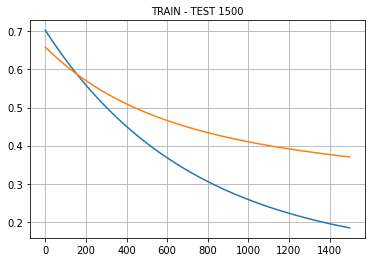

Weights of gradient_descent - training data:  [ 0.04063732  0.05534583 -0.21578978  0.19743403  0.49354592] 

Weights of gradient_descent - testing data:  [0.49132476 0.01001336 0.01726028 0.05193229 0.45384285] 



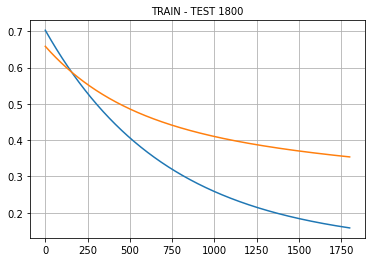

Weights of gradient_descent - training data:  [-0.09214472 -0.07665687 -0.3671231   0.12070371  0.65088371] 

Weights of gradient_descent - testing data:  [ 0.0752221  -0.42064842 -0.23195448 -0.24234488  0.63074757] 



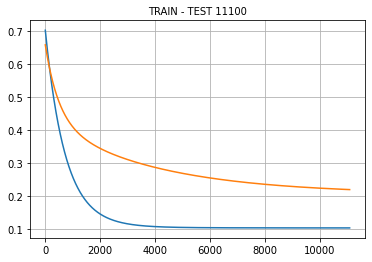

Weights of gradient_descent - training data:  [-0.08660972 -0.09203601 -0.36687041  0.1072892   0.64775736] 

Weights of gradient_descent - testing data:  [-0.14347607 -0.59829772 -0.36155602 -0.34934339  0.69622957] 



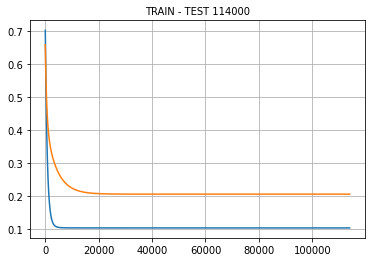

Weights of gradient_descent - training data:  [-0.0916161  -0.07795507 -0.36733083  0.11945089  0.65091078] 

Weights of gradient_descent - testing data:  [ 0.05963864 -0.43367635 -0.24093244 -0.25033646  0.63505659] 



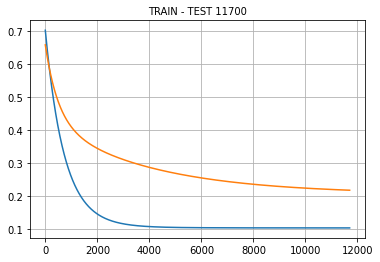

Weights of gradient_descent - training data:  [-0.0913675  -0.07856173 -0.36740545  0.11887784  0.65089783] 

Weights of gradient_descent - testing data:  [ 0.05226612 -0.43982369 -0.24518973 -0.25409912  0.6371084 ] 



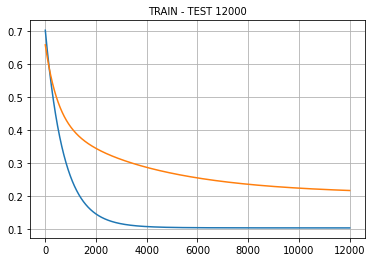

Weights of gradient_descent - training data:  [-0.09112978 -0.07914195 -0.36746443  0.1183367   0.65087106] 

Weights of gradient_descent - testing data:  [ 0.04515995 -0.44573901 -0.24929945 -0.25771503  0.6390946 ] 



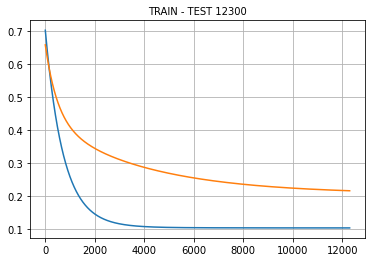

Weights of gradient_descent - training data:  [-0.090903   -0.079697   -0.36751017  0.11782506  0.65083284] 

Weights of gradient_descent - testing data:  [ 0.03831067 -0.45143119 -0.25326658 -0.26119029  0.64101722] 



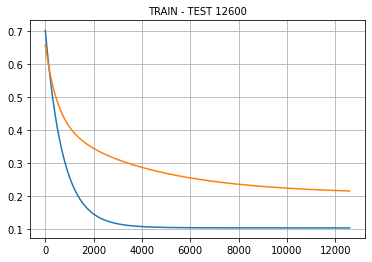

Weights of gradient_descent - training data:  [-0.09068705 -0.08022803 -0.36754468  0.11734077  0.65078523] 

Weights of gradient_descent - testing data:  [ 0.03170913 -0.45690874 -0.25709593 -0.26453066  0.64287819] 



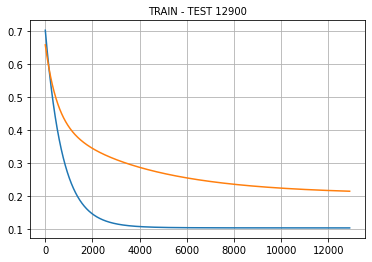

Weights of gradient_descent - training data:  [-0.09048174 -0.08073614 -0.36756972  0.1168819   0.65072995] 

Weights of gradient_descent - testing data:  [ 0.0253465  -0.46217985 -0.26079214 -0.26774166  0.64467939] 



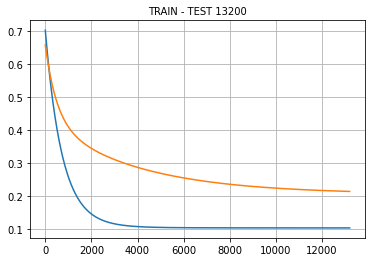

In [182]:
def GD_ploteo():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    #theta = np.zeros(n_features)
    theta = np.random.rand(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rate = 0.0005

    for epoch in epochs:
        theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
        theta_gd1, cost_history1 = gradient_descent(X_test, y_test, theta, epoch, learn_rate)
        error_train = calculate_cost(X_train, y_train, theta_gd)
        error_test = calculate_cost(X_test, y_test, theta_gd)
        
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.plot(range(len(cost_history1)), cost_history1)
        plt.title('TRAIN - TEST '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - training data: ", theta_gd, "\n")
        print("Weights of gradient_descent - testing data: ", theta_gd1, "\n")
        ax.grid(True)
        plt.show()
GD_ploteo()